Q4 test!!!

初始采样取点

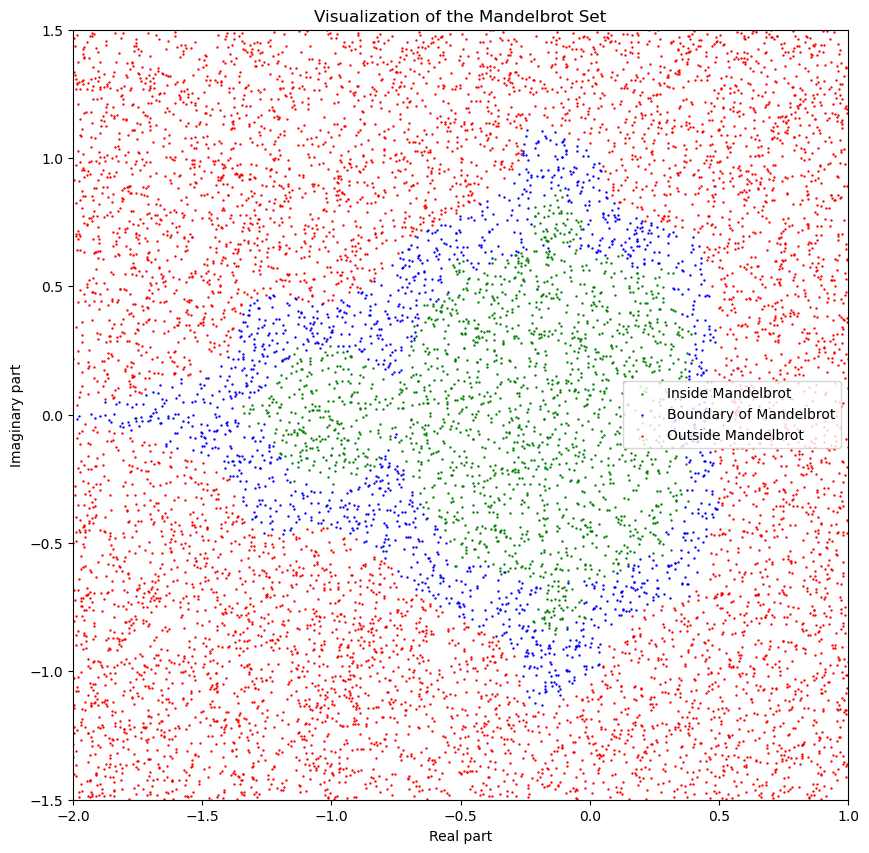

In [149]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def random_sampling(x_range, y_range, num_samples):
    real = np.random.uniform(x_range[0], x_range[1], num_samples)
    imag = np.random.uniform(y_range[0], y_range[1], num_samples)
    return real + imag * 1j

def initial_sampling(x_range, y_range, num_samples, max_iter):
    points = random_sampling(x_range, y_range, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if  stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if 5 < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= 5]
    return np.array(inside_mandelbrot),np.array(boundary_points),np.array(outside_mandelbrot)

x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 10000
max_iter = 2000

#Acquired boundary point
inside_mandelbrot, boundary_points , outside_mandelbrot= initial_sampling(x_range, y_range, num_samples, max_iter)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()


区域可视化

In [150]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares


init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot = initial_sampling(x_range, y_range, num_samples, max_iter)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
#visualize_regions(inside_mandelbrot_squares, 'green')
#visualize_regions(boundary_squares, 'blue')
#visualize_regions(outside_mandelbrot_squares, 'red')


合并三个区域

#下面两个不执行

In [ ]:
def merge_squares(squares, current_sample_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)
    return merged_area

In [ ]:
from shapely.geometry import Polygon
from shapely.geometry import box, Polygon, MultiPolygon
from shapely.ops import unary_union

x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建一个矩形多边形
rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

# 将矩形多边形包装在一个 MultiPolygon 中
init_space = MultiPolygon([rectangle])

def merge_squares(squares, current_sample_space = init_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, Polygon):
        return [list(intersection.exterior.coords)]
    elif isinstance(intersection, MultiPolygon):
        return [list(p.exterior.coords) for p in intersection.geoms]
    else:
        return []

In [151]:
from shapely.geometry import Polygon
from shapely.geometry import box, Polygon, MultiPolygon
from shapely.ops import unary_union

x_range = [-2, 1]
y_range = [-1.5, 1.5]

# 创建一个矩形多边形
rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

# 将矩形多边形包装在一个 MultiPolygon 中
init_space = MultiPolygon([rectangle])

def merge_squares(squares, current_sample_space=init_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
# 计算每个集合
inside_space = merge_squares(inside_mandelbrot_squares, init_space)
boundary_space = merge_squares(boundary_squares, init_space)
outside_space = merge_squares(outside_mandelbrot_squares, init_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space)
print(inside_space.area + boundary_space.area + outside_space.area)


Inside Mandelbrot Set Merged Area: 1.7973190305622635
Boundary of Mandelbrot Set Merged Area: 1.8424860395099836
Outside Mandelbrot Set Merged Area: 6.476433935690977
MULTIPOLYGON (((-1.2122702332733608 -0.2219900364078292, -1.2122702332733608 -0.2070350527716385, -1.2523643757109864 -0.2070350527716385, -1.2523643757109864 -0.1246555171822932, -1.2689712343184265 -0.1246555171822932, -1.2689712343184265 -0.0981273819075522, -1.3579835915432796 -0.0981273819075522, -1.3579835915432796 -0.0897171830511963, -1.3862954338111781 -0.0897171830511963, -1.3862954338111781 -0.0450848301058838, -1.4056909660149124 -0.0450848301058838, -1.4056909660149124 0.0449151698941162, -1.3782920379668193 0.0449151698941162, -1.3782920379668193 0.0716937828377003, -1.3648213123694832 0.0716937828377003, -1.3648213123694832 0.0889550200040906, -1.2837087494735242 0.0889550200040906, -1.2837087494735242 0.1311451948011842, -1.2617623419575958 0.1311451948011842, -1.2617623419575958 0.1373180474103553, -1.250

处理重合部分并补充没有取样到的部分

In [152]:
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = union_of_spaces.difference(init_space)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    
    return inside_space, boundary_space, outside_space

# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space, init_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space)
print(adjusted_outside_space)
print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)


Adjusted Inside Mandelbrot Set Area: 1.2387385665809323
Adjusted Boundary of Mandelbrot Set Area: 1.8424860395099811
Adjusted Outside Mandelbrot Set Area: 5.916947075667792
MULTIPOLYGON (((-0.5251425662712893 0.4510839251623057, -0.4951552839427846 0.4510839251623057, -0.4951552839427846 0.4768698523584498, -0.4566876457120285 0.4768698523584498, -0.4566876457120285 0.5361063938825547, -0.4221288111898009 0.5361063938825547, -0.4221288111898009 0.5393631308993813, -0.370522340800901 0.5393631308993813, -0.370522340800901 0.5483720783816953, -0.3435494024766412 0.5483720783816953, -0.3435494024766412 0.6074128817252679, -0.3318824438329047 0.6074128817252679, -0.3318824438329047 0.6058016482399963, -0.2418824438329048 0.6058016482399963, -0.2418824438329048 0.6173051809502511, -0.1667557584030823 0.6173051809502511, -0.1667557584030823 0.6346590462362939, -0.154751741107415 0.6346590462362939, -0.154751741107415 0.724659046236294, -0.1756296405379402 0.724659046236294, -0.17562964053794

可视化第一次迭代后的结果

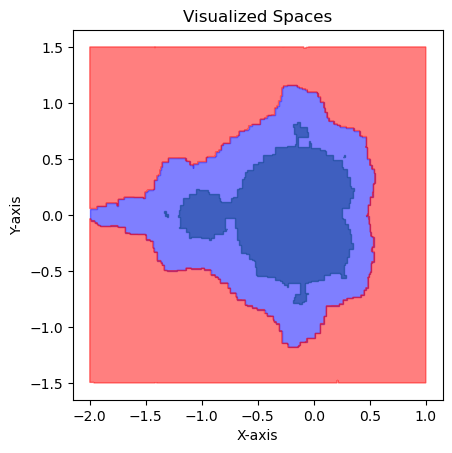

In [153]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue', hole_color='white'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域
visualize_space(adjusted_inside_space, ax, color='green')   # 内部空间为绿色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


进行下一步计算

点采样

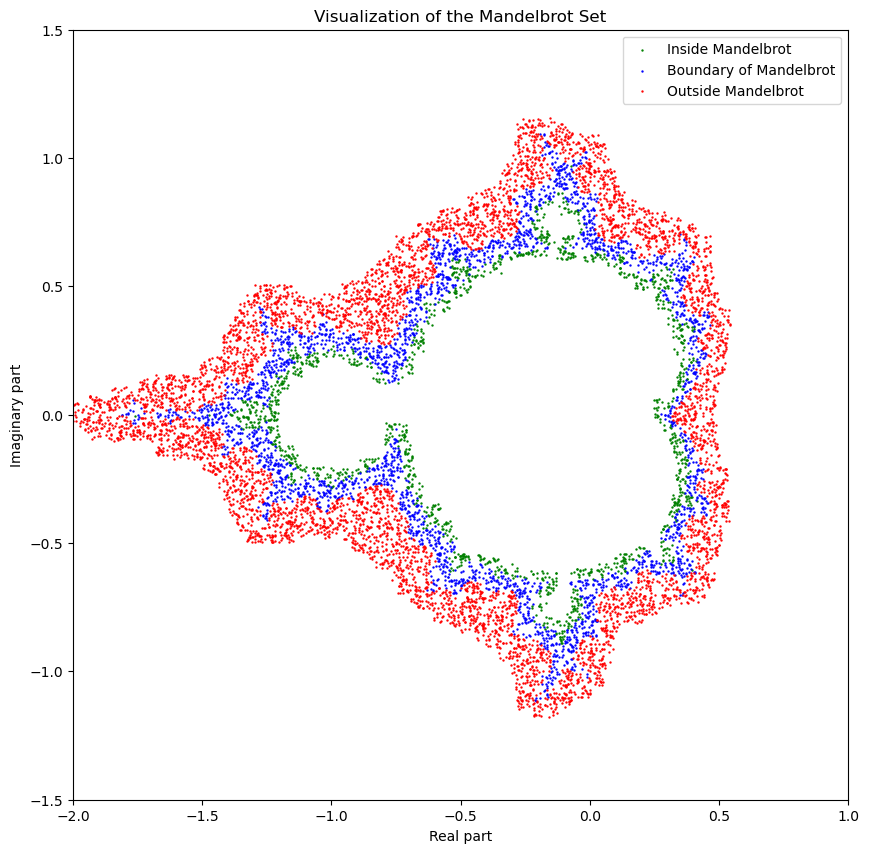

In [154]:
import numpy as np
from shapely.geometry import Point


def random_sampling_within_multipolygon(multipolygon, num_samples):
    """在给定的 MultiPolygon 范围内随机生成点"""
    minx, miny, maxx, maxy = multipolygon.bounds
    points = []
    while len(points) < num_samples:
        real = np.random.uniform(minx, maxx)
        imag = np.random.uniform(miny, maxy)
        point = Point(real, imag)  # 创建一个 Point 对象
        if multipolygon.contains(point):
            complex_point = real + imag * 1j  # 创建一个复数
            points.append(complex_point)
    return points


def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

num_samples = 10000
max_iter = 2000
iteration_threshold = 10
current_sample_space = adjusted_boundary_space
# 进行采样
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

plt.figure(figsize=(10, 10))

# Plot each set of points with different colors
plt.scatter(inside_mandelbrot.real, inside_mandelbrot.imag, color='green', s=0.5, label='Inside Mandelbrot')
plt.scatter(boundary_points.real, boundary_points.imag, color='blue', s=0.5, label='Boundary of Mandelbrot')
plt.scatter(outside_mandelbrot.real, outside_mandelbrot.imag, color='red', s=0.5, label='Outside Mandelbrot')

plt.xlim(x_range)
plt.ylim(y_range)
plt.title('Visualization of the Mandelbrot Set')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.legend()
plt.show()



区域可视化

In [155]:
# Given an array of boundary points, and the size of the side length of the boundary region
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

num_samples = 20000
init_area_of_sample = current_sample_space.area
print(current_sample_space.area)
side_length = init_area_of_sample * 0.01
# Use examples
inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(adjusted_boundary_space, num_samples, max_iter, iteration_threshold)

inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)



# Visualize the area of squares
def visualize_regions(squares, color):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Draw each square
    for square in squares:
        left, right, bottom, top = square
        square_patch = plt.Rectangle((left, bottom), right - left, top - bottom, 
                                     edgecolor=color, facecolor='none')
        ax.add_patch(square_patch)

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    plt.xlabel('Real part')
    plt.ylabel('Imaginary part')
    plt.title('Regions in the Mandelbrot Set')
    plt.show()

# Visualize each set of regions
#visualize_regions(inside_mandelbrot_squares, 'green')
#visualize_regions(boundary_squares, 'blue')
#visualize_regions(outside_mandelbrot_squares, 'red')


1.8424860395099811


合并区域

In [156]:
inside_space = merge_squares(inside_mandelbrot_squares,current_sample_space)
boundary_space = merge_squares(boundary_squares,current_sample_space)
outside_space = merge_squares(outside_mandelbrot_squares,current_sample_space)

print(f"Inside Mandelbrot Set Merged Area: {inside_space.area}")
print(f"Boundary of Mandelbrot Set Merged Area: {boundary_space.area}")
print(f"Outside Mandelbrot Set Merged Area: {outside_space.area}")

print(inside_space.area + boundary_space.area + outside_space.area)

Inside Mandelbrot Set Merged Area: 0.3117897787338945
Boundary of Mandelbrot Set Merged Area: 0.6029225134868056
Outside Mandelbrot Set Merged Area: 1.0792230209146447
1.9939353131353448


处理重合

In [157]:
# Adjust the spaces according to the rules
adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space, boundary_space, outside_space,current_sample_space)

# Calculate the area of adjusted spaces
adjusted_inside_area = adjusted_inside_space.area
adjusted_boundary_area = adjusted_boundary_space.area
adjusted_outside_area = adjusted_outside_space.area

print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_area}")
print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_area}")
print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_area}")

print(adjusted_inside_space.area+adjusted_boundary_space.area+adjusted_outside_space.area)

Adjusted Inside Mandelbrot Set Area: 0.2133528664722604
Adjusted Boundary of Mandelbrot Set Area: 0.6029299018518937
Adjusted Outside Mandelbrot Set Area: 0.9717767954552782
1.788059563779432


可视化

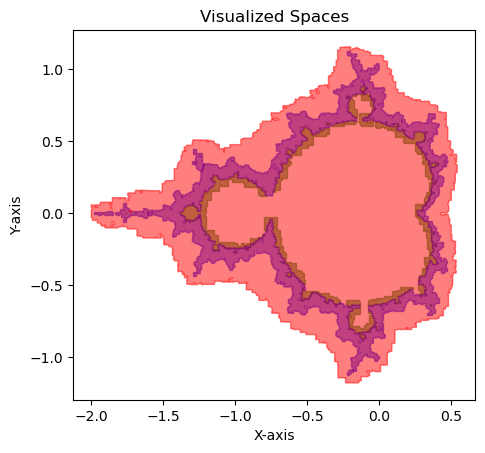

In [158]:
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt

# 更新的可视化函数，允许指定颜色
def visualize_space(merged_rectangles, ax, color='blue', hole_color='white'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形

# 创建一个新的绘图
fig, ax = plt.subplots()

# 可视化三个区域
visualize_space(adjusted_inside_space, ax, color='green')   # 内部空间为绿色
visualize_space(adjusted_boundary_space, ax, color='blue')  # 边界空间为蓝色
visualize_space(adjusted_outside_space, ax, color='red')    # 外部空间为红色

# 设置图像的x和y边界
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Visualized Spaces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Q4 * 综合函数：

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box, MultiPolygon

In [162]:
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

def init_sample_area(x_range,y_range):
    # 创建一个矩形多边形
    rectangle = box(x_range[0], y_range[0], x_range[1], y_range[1])

    # 将矩形多边形包装在一个 MultiPolygon 中
    multipolygon = MultiPolygon([rectangle])
    return multipolygon

def random_sampling_within_multipolygon(multipolygon, num_samples):
    """在给定的 MultiPolygon 范围内随机生成点"""
    minx, miny, maxx, maxy = multipolygon.bounds
    points = []
    while len(points) < num_samples:
        real = np.random.uniform(minx, maxx)
        imag = np.random.uniform(miny, maxy)
        point = Point(real, imag)  # 创建一个 Point 对象
        if multipolygon.contains(point):
            complex_point = real + imag * 1j  # 创建一个复数
            points.append(complex_point)
    return points

#定义采样结果
def random_sampling(multipolygon, num_samples, max_iter, iteration_threshold):
    points = random_sampling_within_multipolygon(multipolygon, num_samples)
    stabilities = [mandelbrot(c, max_iter) for c in points]
    inside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability == max_iter]
    boundary_points = [points[i] for i, stability in enumerate(stabilities) if iteration_threshold < stability < max_iter]
    outside_mandelbrot = [points[i] for i, stability in enumerate(stabilities) if stability <= iteration_threshold]
    return np.array(inside_mandelbrot), np.array(boundary_points), np.array(outside_mandelbrot)

#对于采样结果分成小正方形的集合
def define_regions(points, side_length):
    squares = []
    half_side = side_length / 2

    for point in points:
        left = max(point.real - half_side, x_range[0])
        right = min(point.real + half_side, x_range[1])
        bottom = max(point.imag - half_side, y_range[0])
        top = min(point.imag + half_side, y_range[1])

        # 仅当方形在定义的范围内时才添加
        if left < right and bottom < top:
            squares.append([left, right, bottom, top])

    return squares

#将小正方形的集合转为MultiPolygon格式
def merge_squares(squares, current_sample_space=init_space):
    polygons = [Polygon([(left, bottom), (right, bottom), (right, top), (left, top)]) for left, right, bottom, top in squares]
    merged_area = unary_union(polygons)

    # 使用intersection方法获取合并区域与current_sample_space的交集
    intersection = merged_area.intersection(current_sample_space)

    if isinstance(intersection, MultiPolygon):
        return intersection
    elif isinstance(intersection, Polygon):
        return MultiPolygon([intersection])
    else:
        return MultiPolygon([])  # 返回空的MultiPolygon对象
    
#处理生成的三个MultiPolygon区域
def adjust_spaces(inside_space, boundary_space, outside_space, init_space):
    # Step 1: Add intersection with boundary_space to boundary_space
    boundary_inside_intersection = boundary_space.intersection(inside_space)
    boundary_outside_intersection = boundary_space.intersection(outside_space)
    boundary_space = boundary_space.union(boundary_inside_intersection).union(boundary_outside_intersection)

    # Step 2: Remove intersection with boundary_space from inside_space and outside_space
    inside_space = inside_space.difference(boundary_inside_intersection)
    outside_space = outside_space.difference(boundary_outside_intersection)

    # Step 3: Add intersection between inside_space and outside_space to boundary_space
    inside_outside_intersection = inside_space.intersection(outside_space)
    boundary_space = boundary_space.union(inside_outside_intersection)

    # Remove intersections from inside_space and outside_space
    inside_space = inside_space.difference(inside_outside_intersection)
    outside_space = outside_space.difference(inside_outside_intersection)

    # Step 4: Calculate the difference between the union of all spaces and init_space
    union_of_spaces = inside_space.union(boundary_space).union(outside_space)
    difference = union_of_spaces.difference(init_space)

    # Step 5: Add the difference to boundary_space
    boundary_space = boundary_space.union(difference)
    
    return inside_space, boundary_space, outside_space

#进行每轮的可视化绘图
def visualize_space(merged_rectangles, ax, color='blue', hole_color='white'):
    # 如果是单个 Polygon，将其放入一个列表中
    if isinstance(merged_rectangles, Polygon):
        merged_rectangles = [merged_rectangles]
    # 如果是 MultiPolygon，提取每个 Polygon
    elif isinstance(merged_rectangles, MultiPolygon):
        merged_rectangles = [polygon for polygon in merged_rectangles.geoms]

    # 绘制并填充每个多边形
    for polygon in merged_rectangles:
        x, y = polygon.exterior.xy
        ax.fill(x, y, color=color, alpha=0.5)  # 填充外部多边形


main

In [169]:
x_range = [-2, 1]
y_range = [-1.5, 1.5]
num_samples = 10000
max_iter = 2000
init_area_of_sample = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
init_space = MultiPolygon([box(x_range[0], y_range[0], x_range[1], y_range[1])])


sampletime = 5
aim_samplesize = []
true_samplesize = []
inside = []
outside = []
boundary = []
for i in range(sampletime):
    if i == 0:
        current_sample_space = init_space
        current_area_size = init_area_of_sample
    else:
        current_sample_space = adjusted_boundary_space
        current_area_size = adjusted_boundary_space.area

    aim_samplesize.append(current_sample_space)
    iteration_threshold = (i + 1) * 5
    side_length = current_area_size * 0.01
    inside_mandelbrot, boundary_points , outside_mandelbrot= random_sampling(current_sample_space, 
                                                    num_samples, max_iter, iteration_threshold)

    inside_mandelbrot_squares = define_regions(inside_mandelbrot, side_length)
    boundary_squares = define_regions(boundary_points, side_length)  # 0.1 is the length of the side of the square area
    outside_mandelbrot_squares = define_regions(outside_mandelbrot, side_length)

    inside_space = merge_squares(inside_mandelbrot_squares, current_sample_space)
    boundary_space = merge_squares(boundary_squares, current_sample_space)
    outside_space = merge_squares(outside_mandelbrot_squares, current_sample_space)

    adjusted_inside_space, adjusted_boundary_space, adjusted_outside_space = adjust_spaces(inside_space,
                                                        boundary_space, outside_space, current_sample_space)
    inside.append(adjusted_inside_space.area)
    boundary.append(adjusted_boundary_space.area)
    outside.append(adjusted_outside_space.area)
    print(f"circle {i+1}")
    print(f"Adjusted Inside Mandelbrot Set Area: {adjusted_inside_space.area}")
    print(f"Adjusted Boundary of Mandelbrot Set Area: {adjusted_boundary_space.area}")
    print(f"Adjusted Outside Mandelbrot Set Area: {adjusted_outside_space.area}")

    exact_sample_area = adjusted_inside_space.area + adjusted_boundary_space.area + adjusted_outside_space.area
    true_samplesize.append(exact_sample_area)
    print(f"Mandelbrot set {sum(inside)}")



circle 1
Adjusted Inside Mandelbrot Set Area: 1.2445717441224975
Adjusted Boundary of Mandelbrot Set Area: 1.8187082556984122
Adjusted Outside Mandelbrot Set Area: 5.934759489034525
Mandelbrot set 1.2445717441224975
circle 2
Adjusted Inside Mandelbrot Set Area: 0.19011161571875923
Adjusted Boundary of Mandelbrot Set Area: 0.48195894791878263
Adjusted Outside Mandelbrot Set Area: 0.8336232145604048
Mandelbrot set 1.4346833598412567


KeyboardInterrupt: 